# Setup and Imports


In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef


pd.set_option('display.max_columns', None)

In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [182]:
import os
os.chdir("/content/drive/MyDrive")
datum = pd.read_csv('hp_obp.csv')

In [183]:
datum.tail(5)

,test_date,playing_level,bat_speed_mph_group,pitch_speed_mph_group,jump_height_(imp-mom)_[cm]_mean_cmj,lower-limb_stiffness_[n/m]_mean_cmj,peak_power_[w]_mean_cmj,peak_power_/_bm_[w/kg]_mean_cmj,eccentric_braking_rfd_[n/s]_mean_cmj,eccentric_duration_[ms]_mean_cmj,concentric_duration_[ms]_mean_cmj,rsi-modified_[m/s]_mean_cmj,countermovement_depth_[cm]_mean_cmj,"cmj_stiffness_asymmetry_[%_l,r]_mean_cmj","eccentric_deceleration_impulse_(asymmetry)_[%_l,r]_mean_cmj","p1_concentric_impulse_asymmetry_[%_l,r]_mean_cmj","p2_concentric_impulse_asymmetry_[%_l,r]_mean_cmj",concentric_peak_force_[n]_mean_cmj,eccentric_peak_force_[n]_mean_cmj,minimum_eccentric_force_[n]_mean_cmj,jump_height_(imp-mom)_[cm]_mean_sj,peak_power_[w]_mean_sj,peak_power_/_bm_[w/kg]_mean_sj,"p1_concentric_impulse_asymmetry_[%_l,r]_mean_sj","p2_concentric_impulse_asymmetry_[%_l,r]_mean_sj",peak_vertical_force_[n]_max_imtp,net_peak_vertical_force_[n]_max_imtp,force_at_100ms_[n]_max_imtp,force_at_150ms_[n]_max_imtp,force_at_200ms_[n]_max_imtp,best_active_stiffness_[n/m]_mean_ht,best_jump_height_(flight_time)_[cm]_mean_ht,best_rsi_(flight/contact_time)_mean_ht,best_rsi_(jump_height/contact_time)_[m/s]_mean_ht,peak_takeoff_force_[n]_mean_pp,peak_eccentric_force_[n]_mean_pp,"peak_takeoff_force_asymmetry_[%_l,r]_mean_pp","peak_eccentric_force_asymmetry_[%_l,r]_mean_pp",TSpineRomR,TSpineRomL,ShoulderERL,ShoulderERR,ShoulderIRL,ShoulderIRR,pitching_session_date,pitch_speed_mph,pitching_max_hss,hitting_session_date,bat_speed_mph,hitting_max_hss,relative_strength,body_weight_[lbs],athlete_uid
1929,2024-08-15,High School,NaN,80-85,34.69,5021.67,4393.09,48.78,6151.26,446.75,305.00,0.51,-38.23,3.02,7.14,6.56,2.03,1982.91,1981.42,62.48,28.56,4090.01,45.41,23.90,5.74,3749.3,2864.05,1756.1,2275.0,2615.3,21062.01,25.94,1.79,101.06,1168.36,901.67,-10.53,-4.90,71.0,59.0,NaN,NaN,NaN,NaN,2024-08-15,81.1,44.3,NaN,NaN,NaN,3.24,198.13,3f78722b-39b7-47c8-93f7-0ba270a8f633
1930,2024-08-15,High School,NaN,<80,26.76,6473.25,3328.73,42.55,7126.42,406.33,247.67,0.41,-29.02,7.42,19.26,3.44,2.22,1918.68,1923.46,49.36,23.24,2934.73,37.51,-3.33,2.84,2760.2,1990.48,1212.9,1532.2,1972.6,36992.16,22.67,2.21,116.40,798.52,798.52,3.83,4.75,55.0,58.0,NaN,NaN,NaN,NaN,2024-08-15,74.9,36.1,NaN,NaN,NaN,2.59,172.11,f7ae8f18-8ddd-4f41-8399-40db8ce513d4
1931,2024-08-15,High School,NaN,80-85,45.79,4041.46,5483.98,61.52,4334.73,559.33,291.67,0.59,-41.62,-10.40,-11.46,-13.16,-10.48,2044.80,1973.81,304.31,39.47,4958.92,55.63,-0.05,-10.38,4319.0,3443.36,1194.9,1433.0,1801.8,44735.97,34.96,2.87,188.46,1118.47,892.64,-4.17,-5.58,81.0,74.0,NaN,NaN,NaN,NaN,2024-08-15,82.1,29.0,NaN,NaN,NaN,3.94,196.11,f43dc09e-5869-4289-a536-6bad2276f7b3
1932,2024-08-15,Pro,NaN,80-85,47.57,4559.75,5687.94,60.54,6609.55,547.75,296.75,0.64,-52.30,14.53,18.85,11.08,4.49,2546.44,2550.69,174.74,34.00,5299.26,56.40,23.34,13.25,NaN,NaN,NaN,NaN,NaN,99999.99,32.51,1.92,119.51,NaN,NaN,NaN,NaN,61.0,47.0,NaN,NaN,NaN,NaN,2024-08-15,84.2,35.8,NaN,NaN,NaN,NaN,206.71,0f4caa1f-dcf4-4f83-9099-37f0df1cecbb
1933,2024-08-15,High School,NaN,80-85,30.98,4066.26,3311.29,46.98,4812.42,455.33,301.00,0.49,-36.69,7.53,11.58,1.32,-0.04,1551.43,1563.69,72.51,29.63,3222.17,45.72,8.68,1.46,2940.8,2250.12,1280.9,1736.3,2191.6,34683.40,23.95,2.49,133.37,980.31,709.67,3.50,4.34,50.0,46.0,NaN,NaN,NaN,NaN,2024-08-15,82.4,29.9,NaN,NaN,NaN,3.26,155.06,bc428f82-59e7-4d11-8cf5-79b443afbcfb


In [184]:
datum = datum.drop(['test_date', 'playing_level', 'athlete_uid', 'pitch_speed_mph_group', 'bat_speed_mph_group', 'pitching_session_date', 'hitting_session_date'], axis=1)

In [185]:
from sklearn.impute import SimpleImputer
columns = datum.columns
datum = datum[datum['pitch_speed_mph'].notna()]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
datum = imputer.fit_transform(datum)
datum = pd.DataFrame(datum, columns=columns)

In [186]:
X = datum.drop('pitch_speed_mph', axis=1)
y = datum['pitch_speed_mph']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [188]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif



def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 4.151427
Feature 1: 1.661866
Feature 2: 6.357721
Feature 3: 3.947151
Feature 4: 2.455377
Feature 5: 1.254486
Feature 6: 1.664190
Feature 7: 1.609516
Feature 8: 1.562242
Feature 9: 1.086175
Feature 10: 1.005321
Feature 11: 1.291930
Feature 12: 1.718012
Feature 13: 4.920008
Feature 14: 4.767353
Feature 15: 1.163840
Feature 16: 2.720598
Feature 17: 4.105507
Feature 18: 2.581243
Feature 19: 0.826521
Feature 20: 1.186545
Feature 21: 1.582964
Feature 22: 1.499404
Feature 23: 1.118054
Feature 24: 1.162034
Feature 25: 1.165441
Feature 26: 0.547996
Feature 27: 1.742022
Feature 28: 1.759589
Feature 29: 1.809147
Feature 30: 0.968522
Feature 31: 0.866576
Feature 32: 0.802024
Feature 33: 0.782863
Feature 34: 0.744090
Feature 35: 0.718611
Feature 36: 1.084739
Feature 37: 0.578418
Feature 38: 0.955477
Feature 39: 1.283926
Feature 40: 1.415211
Feature 41: 1.092958
Feature 42: 0.821327
Feature 43: 1.018457
Feature 44: 4.368903


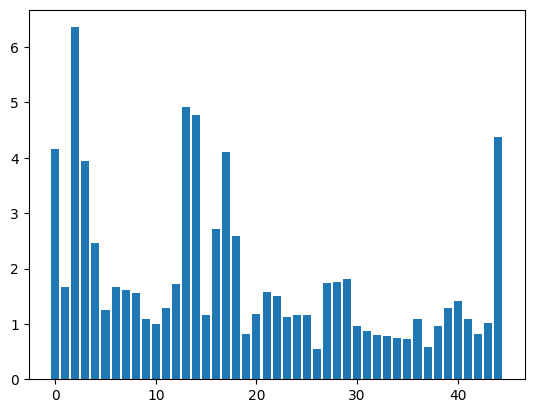

In [189]:




X_train_fs, X_test_fs, fs = select_features(X_train_imputed, y_train, X_test_imputed)

# Display feature scores
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))


import matplotlib.pyplot as plt
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

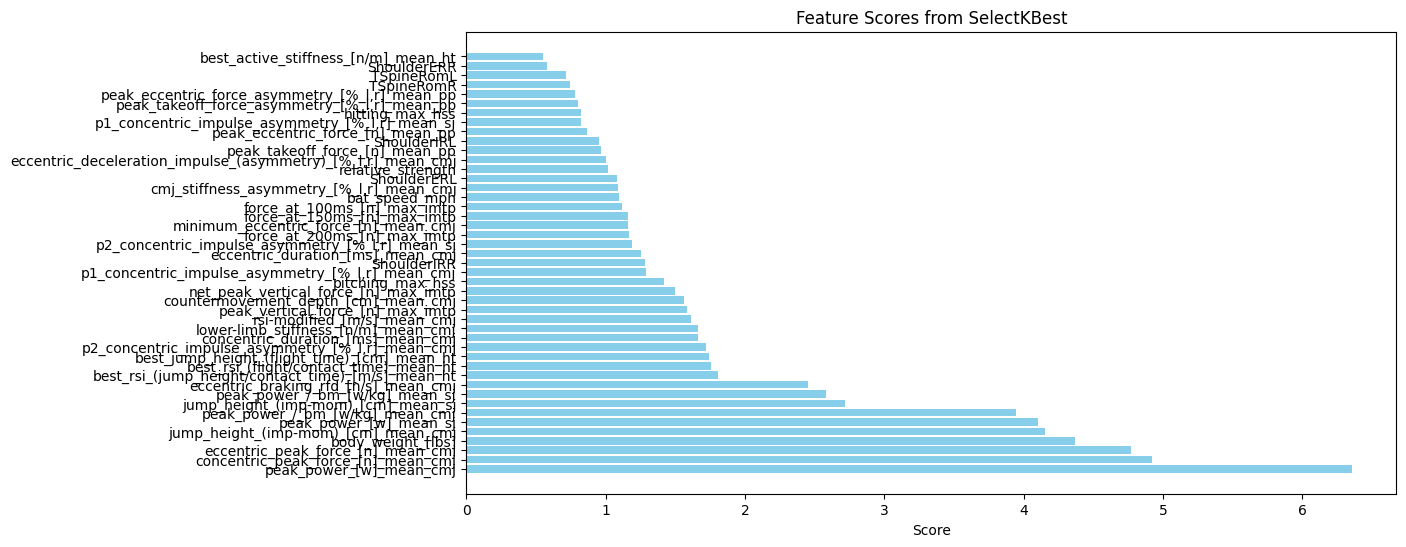

                                 Feature     Score
2                peak_power_[w]_mean_cmj  6.357721
13    concentric_peak_force_[n]_mean_cmj  4.920008
14     eccentric_peak_force_[n]_mean_cmj  4.767353
44                     body_weight_[lbs]  4.368903
0    jump_height_(imp-mom)_[cm]_mean_cmj  4.151427
17                peak_power_[w]_mean_sj  4.105507
3        peak_power_/_bm_[w/kg]_mean_cmj  3.947151
16    jump_height_(imp-mom)_[cm]_mean_sj  2.720598
18        peak_power_/_bm_[w/kg]_mean_sj  2.581243
4   eccentric_braking_rfd_[n/s]_mean_cmj  2.455377


In [190]:
feature_names = X.columns

scores_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': fs.scores_
})

scores_df = scores_df.sort_values(by='Score', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(scores_df['Feature'], scores_df['Score'], color='skyblue')
plt.xlabel('Score')
plt.title('Feature Scores from SelectKBest')
plt.show()


top_n = 10
print(scores_df.head(top_n))

# Model Fitting

In [191]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Testing and Visualization

In [192]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = root_mean_squared_error(y_test, y_pred)    # Mean Squared Error
rmse = root_mean_squared_error(y_test, y_pred)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)                # R-squared


print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 4.755214237287121
Mean Squared Error: 10.692814523143843
Root Mean Squared Error: 10.692814523143843
R-squared: 0.46306291833734947
